regression


FileNotFoundError: [Errno 2] No such file or directory: '../../results/regression/exp9/csv/gaussianLinear_0.0.csv'

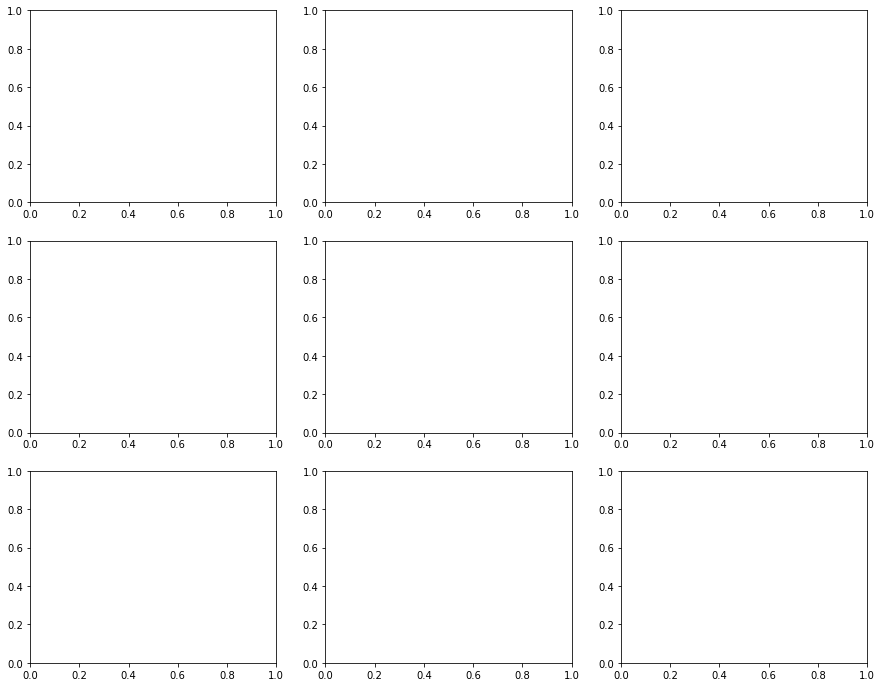

In [4]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
# plt.rc('pgf', texsystem='pdflatex')
# plt.style.use('science')
plt.rcParams["figure.figsize"] = (17,17)
import os
import pandas as pd

mode="regression"
datasets={"regression": ["gaussianLinear", "gaussianNonLinearAdditive", "gaussianPiecewiseConstant"]}
metrics=["roar_faithfulness", "roar_monotonicity", "faithfulness", "monotonicity", "shapley"]
results_dir="../../results/"
output_dir=f"plots/{mode}"

# Important initializations
rhos = [0.0, 0.25, 0.5, 0.75, 0.99]
explainers = ["random", "shap", "shapr", "brutekernelshap", "maple", "lime", "l2x"]
models = ['LR', 'DTREE', 'MLP']

def collect_data(file_path, rho):
    lines = open(file_path, 'r').readlines()
    for idx, line in enumerate(lines):
        if line.strip().split(",")[0] in models:
            model = line.strip().split(",")[0]
            model_perfs[model][rho] = line.strip().split(",")[1:]
            df = pd.read_csv(file_path, skiprows=idx+1, nrows=len(explainers))
            df.columns.values[0] = "explainer"
            scores[model][rho] = df

for metric in metrics:
    num_models, num_datasets = len(models), len(datasets[mode])
    fig, axs = plt.subplots(figsize=(5.0*num_models, 4.0*num_datasets), nrows=num_datasets, ncols=num_models)

    for data_idx, dataset in enumerate(datasets[mode]):
        scores = {model: {} for model in models}
        model_perfs = {model: {} for model in models}

        for rho in rhos:
            print(mode)
            file_path = os.path.join(results_dir, mode, "exp9", "csv", f"{dataset}_{rho}.csv")
            collect_data(file_path, rho)

        for idx, model in enumerate(models):
            for explainer in explainers:
                values = [scores[model][r].query(f'explainer=="{explainer}"')[metric] for r in rhos]
                axs[data_idx][idx].plot(rhos, values, linewidth=5, label = explainer)
            axs2 = axs[data_idx][idx].twinx()
            axs[data_idx][idx].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            axs2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            perfs = [float(model_perfs[model][r][1]) for r in rhos]
            axs2.plot(rhos, perfs, linestyle='dashed', color='lightgrey', label='modelPerf')
            axs[data_idx][idx].set_xlabel("Rho")
            # axs[data_idx][idx].set_ylabel(f"{metric} metric value")
            if idx == 0:
                axs[data_idx][idx].set_ylabel(dataset, fontsize=14)
            if data_idx == 0:
                axs[data_idx][idx].set_title(model)
            if model == "DTREE":
                lines, labels = axs[data_idx][idx].get_legend_handles_labels()
                lines2, labels2 = axs2.get_legend_handles_labels()
                axs[data_idx][idx].legend(lines + lines2, labels + labels2, loc=0)
                # axs[data_idx][idx].legend()  # bbox_to_anchor=(1.1, 1.05), loc="upper right")
    # fig.suptitle(f"Performance of explainers on the {metric} metric", fontsize=20)
    plt.show()
    plt_save_path = os.path.join(output_dir, f"{metric}_all.pdf")
    if not os.path.exists(os.path.dirname(plt_save_path)):
        os.makedirs(os.path.dirname(plt_save_path))
    fig.tight_layout()
    plt.savefig(plt_save_path, bbox_inches='tight')
    plt.clf()
    plt.cla()